In [1]:
import numpy as np
import pandas as pd

# Helper classes for data processing, state representation
from reinforcetrader.data_pipeline import RawDataLoader, FeatureBuilder
from reinforcetrader.state import EpisodeStateLoader
from reinforcetrader.dqn_agent import RLAgent

# Other utils functions
from reinforcetrader.utils.rewards import evaluate_reward_function

# Helper method for displaying large dataframes
from IPython.display import HTML
pd.set_option("display.max_rows", None)
from IPython.display import HTML, display

def display_df(df, rows=10):
    # Puts the scrollbar next to the DataFrame
    display(HTML("<div style='height: 300px; overflow: auto; width: 98%'>" + df.head(rows).to_html() + "</div>"))

2025-08-22 23:49:41.170697: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


I0000 00:00:1755931787.465742   33865 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3584 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


[*********************100%***********************]  1 of 1 completed
/home/shiv/projects/ReinforceTrader/reinforcetrader/utils/rewards.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data.index, rotation=45)


Dropped 0 tickers. 1 tickers left.


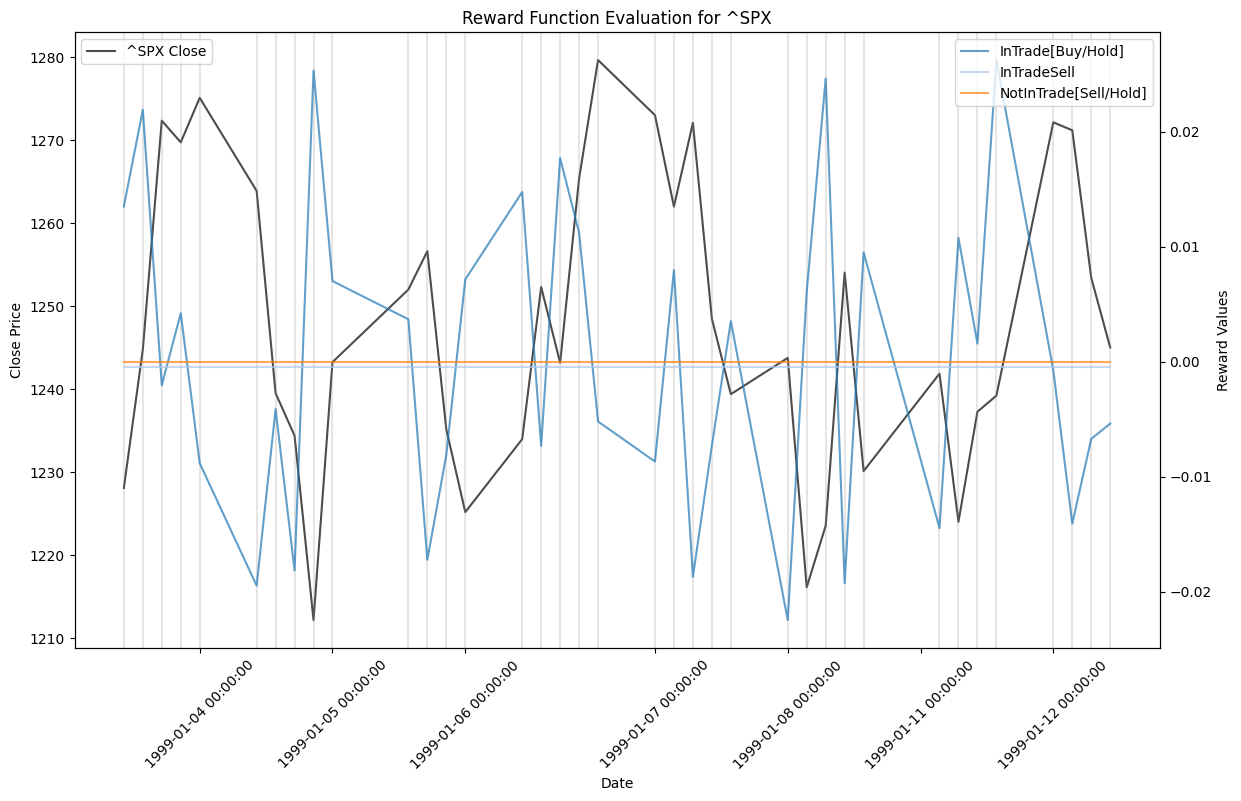

In [2]:
# Init the RL agent and DQN Model
window_size = 26
agent = RLAgent(window_size=window_size, num_features=(3, 8))

rewards = evaluate_reward_function(ticker='^SPX', start_date='1999-01-01', end_date='1999-03-01', reward_fn=agent.calculate_reward)

In [3]:
display(rewards)

,InTrade[Buy/Hold],InTradeSell,NotInTrade[Sell/Hold],Close,Next Close
Date,,,,,
1999-01-04,0.013491,-0.0005,0.0,1228.099976,1244.780029
1999-01-05,0.021899,-0.0005,0.0,1244.780029,1272.339966
1999-01-06,-0.002053,-0.0005,-0.0,1272.339966,1269.729980
1999-01-07,0.004212,-0.0005,0.0,1269.729980,1275.089966
1999-01-08,-0.008830,-0.0005,-0.0,1275.089966,1263.880005
1999-01-11,-0.019470,-0.0005,-0.0,1263.880005,1239.510010
1999-01-12,-0.004131,-0.0005,-0.0,1239.510010,1234.400024
1999-01-13,-0.018156,-0.0005,-0.0,1234.400024,1212.189941
1999-01-14,0.025308,-0.0005,0.0,1212.189941,1243.260010


# Data Pre-processing and Feature Building

In [3]:
# Get DJI raw data using Yahoo Finance API
data_loader = RawDataLoader(start_date='2000-02-20', end_date='2025-08-11', index='DJI')

# Download or load from cache the data
raw_data = data_loader.get_hist_prices()

# Inspect the raw DJI close and volume data
display_df(raw_data)

Loading cached data from data/raw/DJI_tickers_data_2000-02-20_2025-08-11.csv


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,HON,IBM,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,VZ,WMT,AAPL,AMGN,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,HON,IBM,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,VZ,WMT,AAPL,AMGN,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,HON,IBM,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,VZ,WMT,AAPL,AMGN,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,HON,IBM,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,VZ,WMT,AAPL,AMGN,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,HON,IBM,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,VZ,WMT
Price,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,High,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Open,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-02-22,0.854166,46.676109,3.178125,28.713057,25.179060,9.998345,40.554939,14.651798,25.399885,57.333950,31.572756,25.384872,55.299938,20.309631,24.652763,12.682285,17.359308,18.637793,24.871799,28.753780,2.537752,0.125123,23.644182,4.486304,12.680248,5.775241,13.901400,10.256793,0.877620,49.744631,3.325000,28.945239,25.867234,10.145140,41.577505,14.748590,26.969541,57.905093,32.713496,25.384872,56.514296,20.422642,25.171348,12.896720,17.829386,18.702416,24.871799,29.769070,2.702236,0.126317,23.787384,4.514520,13.012192,5.855026,14.051056,10.509882,0.800693,45.898174,3.153125,28.403483,23.235981,9.786309,39.675533,14.373523,24.829101,56.718873,31.278371,23.101576,54.178996,19.825300,23.974612,12.375950,17.292154,17.888145,23.471574,28.447278,2.537752,0.120348,22.928174,4.443981,12.248721,5.664769,13.618716,9.963741,0.826492,49.571757,3.246875,28.790451,23.316943,9.835240,41.413894,14.530809,26.969541,57.114280,31.867140,23.672402,55.798136,20.148188,24.253852,12.590385,17.325731,18.146644,23.732633,29.156065,2.690487,0.124647,23.500981,4.500412,12.547471,5.695455,13.967913,10.496562,422296000,8657100,113716000,13781561,4771400,4028800,61144400,3526400,12744146,720100,8019200,2590601,8006921,7307400,7068600,10543000,4479500,3449982,9640971,66296200,12847200,542496000,5226800,1626000,966400,5828800,3589701,37027800
2000-02-23,0.872459,49.398857,3.521875,28.506668,24.045609,9.867858,45.360985,14.179929,25.970669,60.277523,32.271923,24.276802,54.178989,19.663868,24.692659,12.559752,17.527197,19.213810,23.969952,28.887888,2.637617,0.125840,23.071363,4.514520,12.613857,5.621806,13.369296,10.017022,0.893098,49.874262,3.587500,29.035526,25.057629,10.096205,45.483693,14.530797,26.351190,61.156204,32.382317,25.384874,55.050832,20.228922,25.271083,12.605703,17.930121,19.552036,25.061652,29.347642,2.678737,0.127154,23.644170,4.542735,12.813023,5.744553,13.851522,10.336715,0.833058,46.416774,3.234375,28.209992,24.005128,9.704753,41.332079,14.095236,24.829100,56.982469,31.131182,23.605245,54.054440,19.663868,24.433368,12.253417,17.392889,18.901602,23.969952,28.217413,2.625868,0.122139,22.944073,4.373441,12.481080,5.584982,13.319411,9.963740,0.849827,47.497239,3.243750,28.687255,25.057629,9.998342,41.557043,14.518698,25.399884,57.158205,31.903942,25.384874,55.050832,20.180488,24.692659,12.605703,17.426466,19.018681,25.061652,28.658011,2.655240,0.123691,23.644170,4.542735,12.613857,5.720004,13.602095,10.323393,473099200,9098600,168824000,10902205,3880800,4894400,105707800,3770000,8371718,702900

In [4]:
# Instantiate Feature Builder to Build relevant features for state space
feature_builder = FeatureBuilder(hist_prices=raw_data)

# Build the features
feature_builder.build_features()
features_data = feature_builder.get_features()

# Inspect the features
display_df(features_data, rows=5)

Building ticker features: 100%|█████████████████████████████████████| 28/28 [00:02<00:00,  9.51it/s]

File already exists, skipping save: data/processed/DJI_tickers_features_2000-03-28_2025-08-08.csv


# State Representation

In [5]:
state_loader = EpisodeStateLoader(features_data, 'configs/episodes.json')

In [6]:
state_loader.get_state_matrix('train', 1, 'AAPL', 2, 4)

array([[ 0.38463455,  0.5897253 ,  0.02564011,  0.00802285,  0.04343423,
         0.04222202,  0.8291178 ,  0.2665844 ,  0.2850386 ,  0.        ,
         0.5313614 ],
       [ 0.38463455,  0.5897253 ,  0.02564011,  0.00802285,  0.04343423,
         0.04222202,  0.8291178 ,  0.2665844 ,  0.2850386 ,  0.        ,
         0.5313614 ],
       [-0.6128125 ,  0.01113928,  0.37604818, -0.01009861,  0.03409885,
         0.04086553,  0.7230421 ,  0.2711807 ,  0.19796352,  0.        ,
         0.70516175],
       [-0.6377509 ,  0.3367397 ,  0.02550943, -0.05781392,  0.01272241,
         0.03407596,  0.4237374 ,  0.26780808, -0.02859681,  0.34759647,
         1.2002095 ]], dtype=float32)

In [7]:
state_loader.get_state_OHLCV('train', 1, 'AAPL', 1)

array([1.0460141e+00, 1.0464830e+00, 1.0043843e+00, 1.0202154e+00,
       2.3983680e+08], dtype=float32)

# Deep Q-Network and RL Agent

In [8]:
# Init the RL agent and DQN Model
window_size = 26
agent = RLAgent(window_size=window_size, num_features=(3, 8))

[*********************100%***********************]  1 of 1 completed

Dropped 0 tickers. 1 tickers left.


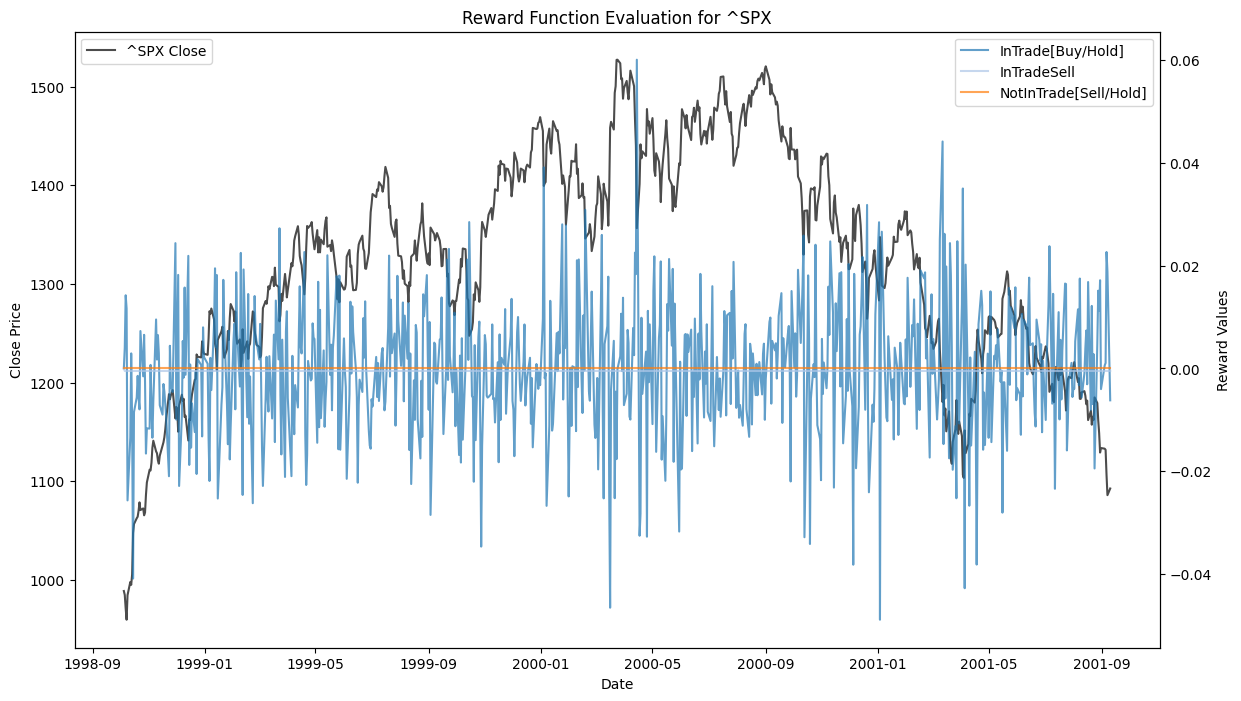

,InTrade[Buy/Hold],InTradeSell,NotInTrade[Sell/Hold]
Date,,,
1998-10-05,0.000000,0.0000,0.0
1998-10-06,0.004024,-0.0005,0.0
1998-10-07,0.014228,-0.0005,0.0
1998-10-08,0.011647,-0.0005,0.0
1998-10-09,-0.025672,-0.0005,-0.0
1998-10-12,-0.013441,-0.0005,-0.0
1998-10-13,0.002921,-0.0005,0.0
1998-10-14,-0.010728,-0.0005,-0.0
1998-10-15,-0.040882,-0.0005,-0.0


In [9]:
evaluate_reward_function(ticker='^SPX', start_date='1998-10-5', end_date='2001-09-17', reward_fn=agent.calculate_reward)

# Reward Function and Evaluation

In [10]:
training_config = {
    'batch_size': 256,
    'val_group_size': 5
    'model_dir': 'model_checkpoints/',
    'plots_dir': 'plots/validation/'
}

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3102998760.py, line 3)

episode_list = np.arange(1, 8)
agent.train(state_loader, [1], 64, 5)